importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processing


In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

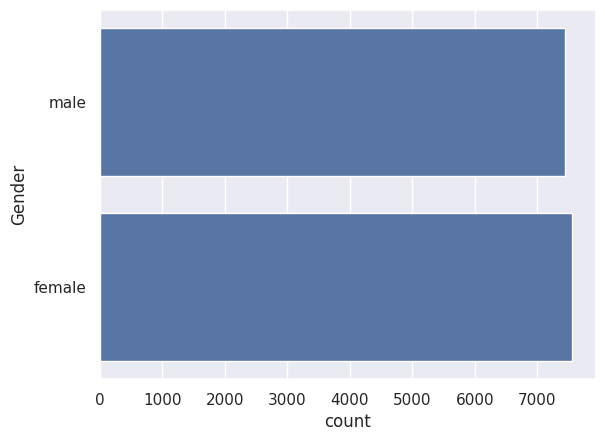

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-17-6cbf196d4d06>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

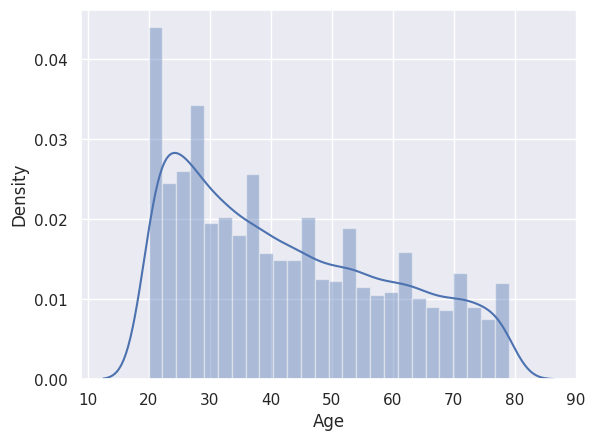

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<ipython-input-19-ac6457c483b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

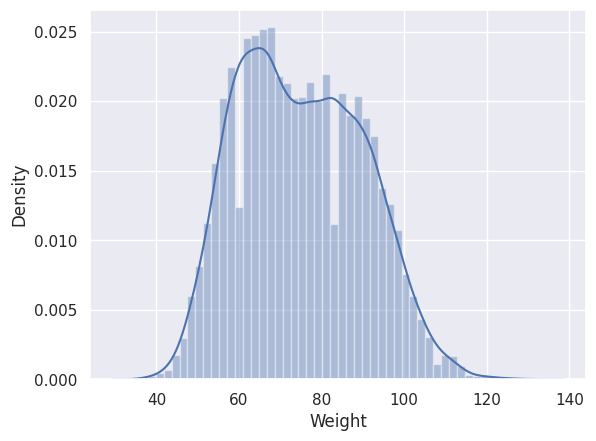

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

<ipython-input-20-fdc2a1fecb6d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

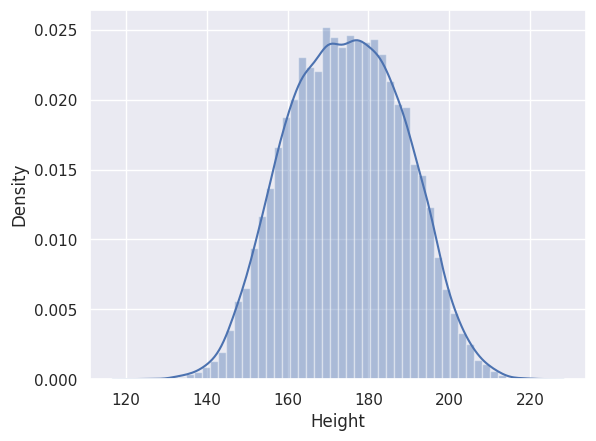

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

inding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = calories_data.corr(numeric_only=True)
 # add numeric_only=True to only include numerical columns in the correlation calculation

<Axes: >

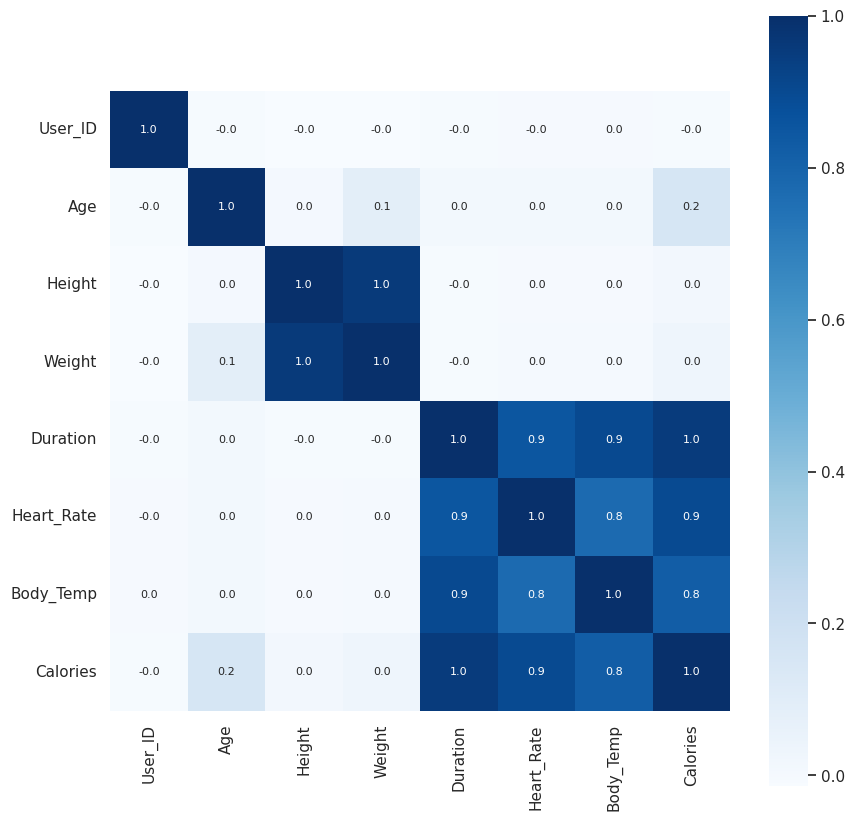

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical

*   List item
*   List item


In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132


In [ ]:
# Example code to load the dataset and display basic statistics
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/exercise.csv')

# Display basic statistics
print(data.describe())


            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp  
count  15000.000000  15000.000000  
mean      95.518533     40.025453  
std        9.583328      0.779230  
min       67.000000     37.100000  
25%       88.000000     39.600000  
50%       96.000000     40.200000  
75%      103.000000     40.600000  


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import the train_test_split function


In [ ]:
# Load the dataset
data = pd.read_csv('/content/exercise.csv')



In [ ]:
# Print the column names to identify the target variable
print(data.columns)


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [ ]:
pip install xgboost scikit-learn


In [ ]:
print(data.head())


    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


In [ ]:
print("Columns in the DataFrame:")
for col in data.columns:
    print(f"'{col}'")


Columns in the DataFrame:
'User_ID'
'Gender'
'Age'
'Height'
'Weight'
'Duration'
'Heart_Rate'
'Body_Temp'


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/exercise.csv')  # Update with your actual dataset path

# Display the first few rows of the DataFrame and its columns
print("First few rows of the DataFrame:")
print(data.head())

# Print the column names
print("\nColumns in the DataFrame:")
print(data.columns.tolist())  # Convert to list for better readability


First few rows of the DataFrame:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Columns in the DataFrame:
['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [ ]:
# Clean column names (remove leading/trailing spaces and replace spaces with underscores if needed)
data.columns = data.columns.str.strip().str.replace(' ', '_')


In [ ]:
# Print cleaned column names
print("\nCleaned Columns in the DataFrame:")
print(data.columns.tolist())



Cleaned Columns in the DataFrame:
['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [ ]:
print(data.shape) # Use 'data' instead of 'exercise_data'
print(calories.shape)

NameError: name 'data' is not defined

In [ ]:
# Load the necessary libraries
import pandas as pd

# Load the exercise data and calories data
exercise_data = pd.read_csv('/content/exercise.csv')  # Adjust the path if necessary
calories = pd.read_csv('/content/calories.csv')  # Adjust the path if necessary

# Print the first few rows of each dataset to confirm they are loaded
print("Exercise Data Head:\n", exercise_data.head())
print("Calories Data Head:\n", calories.head())


Exercise Data Head:
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
Calories Data Head:
     User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [ ]:
# Assuming the 'Calories' column exists in the calories DataFrame
calories_series = calories['Calories']  # Ensure 'Calories' is the correct column name

# Concatenate the two dataframes
calories_data = pd.concat([exercise_data, calories_series], axis=1)

# Display the merged data
print("Merged Data Head:\n", calories_data.head())


Merged Data Head:
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data from CSV files
exercise_data = pd.read_csv('/content/exercise.csv')  # Ensure the path is correct
calories = pd.read_csv('/content/calories.csv')  # Ensure the path is correct

# Print the first few rows of each dataset to confirm they are loaded
print("Exercise Data Head:\n", exercise_data.head())
print("Calories Data Head:\n", calories.head())

# Check the columns in the calories dataframe to confirm 'Calories' column exists
print("Calories Data Columns:", calories.columns)

# Select the 'Calories' column
calories_series = calories['Calories']

# Merge the two dataframes
calories_data = pd.concat([exercise_data, calories_series], axis=1)

# Display the merged data
print("Merged Data Head:\n", calories_data.head())


Exercise Data Head:
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
Calories Data Head:
     User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
Calories Data Columns: Index(['User_ID', 'Calories'], dtype='object')
Merged Data Head:
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0

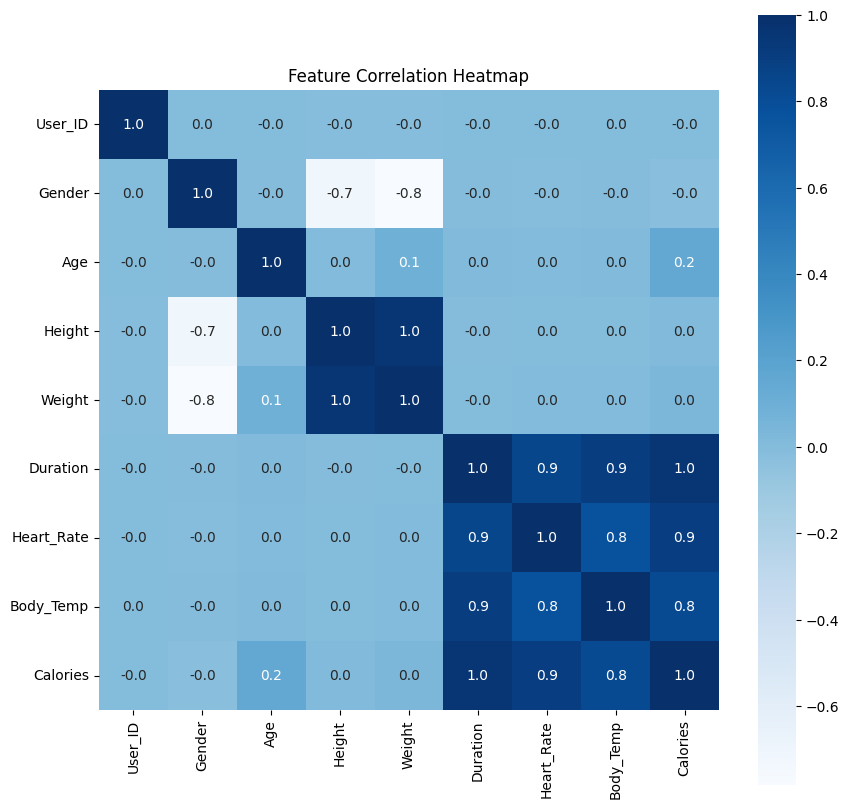

In [ ]:
# Correlation heatmap to visualize relationships
import matplotlib.pyplot as plt
import seaborn as sns

correlation = calories_data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation_heatmap.png')  # Save the figure
plt.show()


In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Step 2: Load the Data
calories = pd.read_csv('/content/calories.csv')
exercise_data = pd.read_csv('/content/exercise.csv')

# Step 3: Combine the two DataFrames
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

# Step 4: Preprocess the Data
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)

# Step 5: Define Features and Target Variable
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

# Step 6: Split the Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Now you can proceed to define and train your model
# Load and train the XGBoost model
model = XGBRegressor(learning_rate=0.1, max_depth=6)

# Train the model
model.fit(X_train, Y_train)

# You can now continue with your evaluation and prediction steps


<ipython-input-16-b38a27e3c7c8>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.9989304  0.9988251  0.99911951 0.99903635 0.99894158]


In [ ]:
from sklearn import metrics

# Predictions on the test set
test_data_prediction = model.predict(X_test)

# Evaluation metrics
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
r2 = metrics.r2_score(Y_test, test_data_prediction)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("RMSE:", rmse)


Mean Absolute Error: 1.2497338334918022
R-squared: 0.9991167364159682
RMSE: 1.8625621022561203


In [ ]:
# Check the shape of X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

# Check the columns in X_train and X_test to ensure they match
print("X_train columns: ", X_train.columns)
print("X_test columns: ", X_test.columns)


X_train shape:  (12000, 7)
X_test shape:  (3000, 7)
X_train columns:  Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')
X_test columns:  Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')


In [ ]:
# Ensure that both X_train and X_test have the same preprocessing steps
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Check shapes
print(X_train.shape, X_test.shape)


(12000, 7) (3000, 7)


In [ ]:
# Example of making predictions with new input data
# The model was trained on a dataset with 7 features.
# Ensure new_data has the same number of features
new_data = np.array([[60, 140, 75, 25, 0, 100, 100]])
# Example input (duration, heart_rate, weight, age, gender, height, body_temp)
predicted_calories = model.predict(new_data)
print("Predicted Calories Burnt:", predicted_calories)

Predicted Calories Burnt: [13.022921]


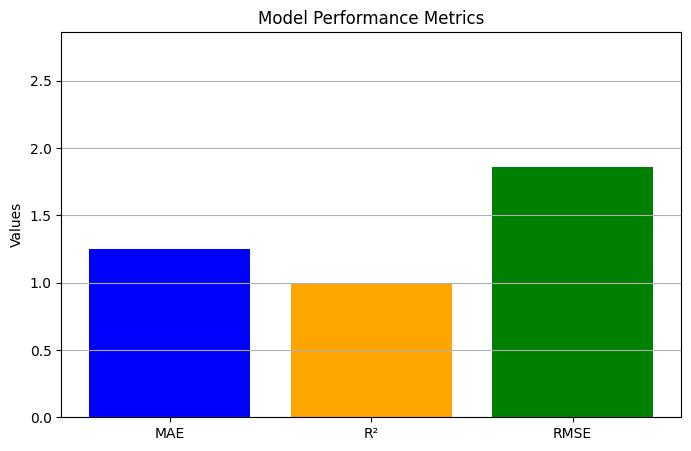

In [ ]:
import matplotlib.pyplot as plt

# Performance metrics data
metrics = ['MAE', 'R²', 'RMSE']
values = [1.25, 0.9991, 1.86]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.ylim(0, max(values) + 1)  # Set y-limit for better visibility
plt.grid(axis='y')
plt.savefig('performance_metrics.png')  # Save the figure
plt.show()


    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


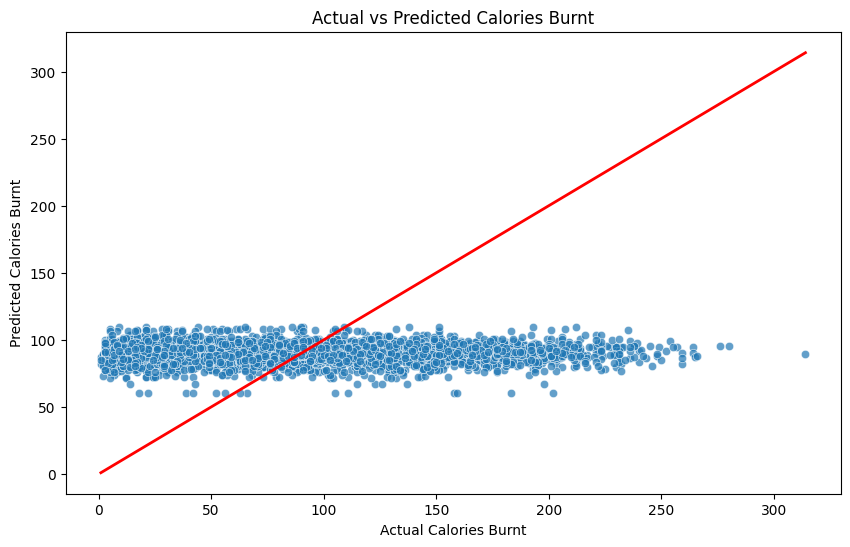

In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Load your data (replace 'calories_data.csv' with the actual path to your dataset)
calories_data = pd.read_csv('/content/calories.csv')

# Check the first few rows of your data to ensure it has loaded correctly
print(calories_data.head())

# Define features and target variable
# Assuming 'Calories' is the target variable and other columns are features
X = calories_data.drop(columns=['Calories'])  # Dropping the target column
Y = calories_data['Calories']  # Target column (calories burnt)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define and train the model
model = XGBRegressor(learning_rate=0.1, max_depth=6)
model.fit(X_train, Y_train)

# Generate predictions
predictions = model.predict(X_test)

# Plot Predicted vs Actual
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=predictions, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Calories Burnt')
plt.ylabel('Predicted Calories Burnt')
plt.title('Actual vs Predicted Calories Burnt')
plt.show()


In [ ]:
calories_data.describe()


,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


from matplotlib import pyplot as plt
_df_5['User_ID'].plot(kind='hist', bins=20, title='User_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='User_ID', y='Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['User_ID'].plot(kind='line', figsize=(8, 4), title='User_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Calories', ylabel='count'>

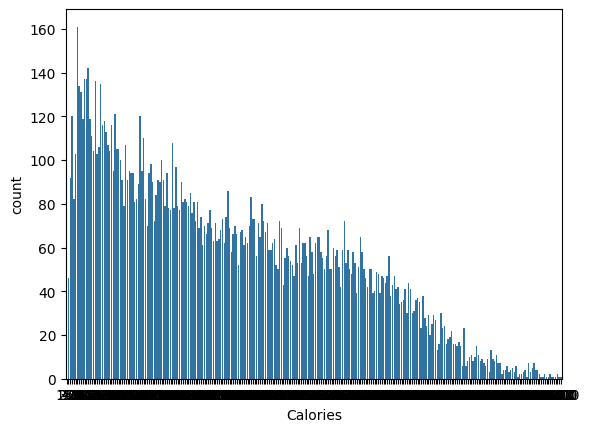

In [ ]:
# plotting the gender column in count plot
sns.countplot(x='Calories', data=calories_data)
# Changed 'Gender' to 'Calories' as it's the only other column available

In [ ]:
sns.distplot(calories_data['Age'])


KeyError: 'Age'

<ipython-input-17-cff9c7449fb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Calories']) # Changed 'Weight' to 'Calories' as it's one of the available columns


<Axes: xlabel='Calories', ylabel='Density'>

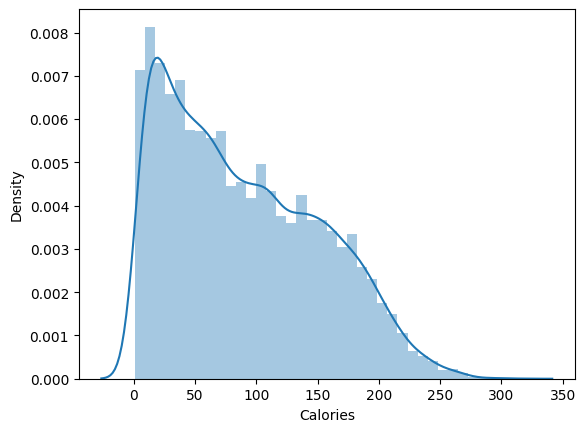

In [ ]:
sns.distplot(calories_data['Calories']) # Changed 'Weight' to 'Calories' as it's one of the available columns

<ipython-input-19-ccce3c071f2f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Calories']) # Changed 'Height' to 'Calories' as it's one of the available columns


<Axes: xlabel='Calories', ylabel='Density'>

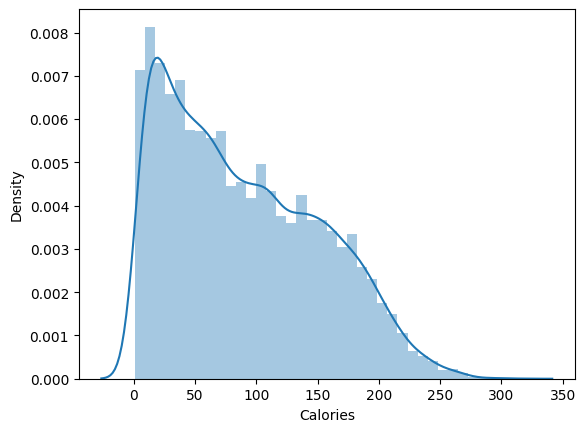

In [ ]:
sns.distplot(calories_data['Calories']) # Changed 'Height' to 'Calories' as it's one of the available columns

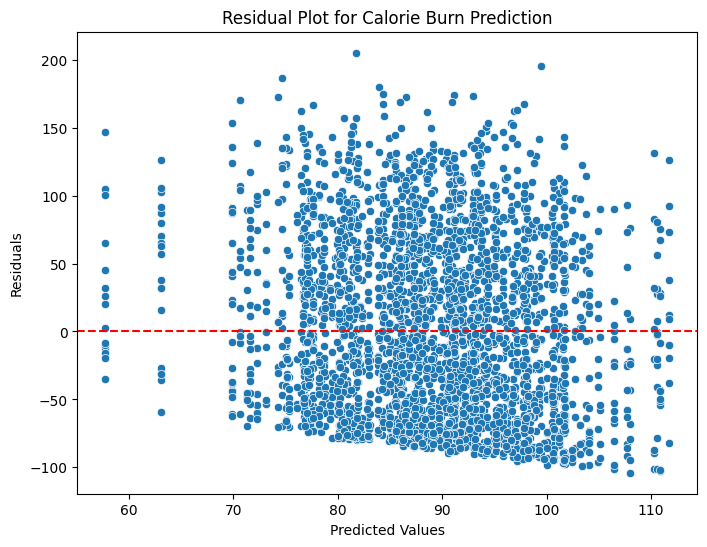

In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Load the dataset
calories_data = pd.read_csv('/content/calories.csv')

# Data Preprocessing (Replace this with your actual preprocessing steps)
X = calories_data.drop(columns=['Calories'])  # Features
Y = calories_data['Calories']  # Target

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and training the XGBoost regressor
model = XGBRegressor()
model.fit(X_train, Y_train)

# Predicting the values on the test data
y_pred = model.predict(X_test)

# Calculate residuals (difference between actual and predicted values)
residuals = Y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Calorie Burn Prediction')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
